In [1]:
import pandas as pd
import numpy as np
import sklearn
import chardet
import warnings
warnings.filterwarnings("ignore")

In [2]:
with open("G:\SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
data = pd.read_csv("G:\SMSSpamCollection",sep='\t',names=["v1","v2"],encoding=result['encoding'])

In [3]:
data=data[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [4]:
data.head()
data.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
data.drop_duplicates(subset="sms",inplace=True)
data.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,Hi its Kate it was lovely to see you tonight a...
freq,4516,1


In [6]:
sms = data['sms']
label = data['label']

In [7]:
from sklearn.model_selection import train_test_split
sms_train, sms_test, label_train, label_test = train_test_split(sms, label, random_state=69)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## TF-IDF Vectorizer 

In [9]:
vectorizer = TfidfVectorizer(max_features=5000)

In [10]:
def set_binary_labels(label):
    if label == 'spam':
        return 1
    else:
        return 0

# Model_1 : Logistic Regression

Logistic regression is a traditional statistics technique that is also very popular as a machine learning tool. 

Logistic regression is based on logistic distribution under which we assume that the dependent variable is dichotomous in nature. We use the logistic model to compute the probability of falling in any one of the classes.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression(random_state=42)
pipeline_logistic = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', logistic_regression)])

### Calculating Cross Validation score

In [12]:
#Cross Validation Score
cv_score_regression = cross_val_score(pipeline_logistic, sms_train, label_train, cv=5)
print("The cross validation score for Logistic Regression is:")
print(cv_score_regression)

The cross validation score for Logistic Regression is:
[0.96005155 0.96262887 0.95870968 0.96645161 0.96124031]


### Statistics of the fitting

In [13]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_logistic.fit(sms_train, label_train)
label_predicted = pipeline_logistic.predict(sms_test)


print(classification_report(label_test,label_predicted))


              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1124
        spam       0.98      0.77      0.86       169

   micro avg       0.97      0.97      0.97      1293
   macro avg       0.97      0.88      0.92      1293
weighted avg       0.97      0.97      0.97      1293



### Precision Recall Curve

The precision recall curve


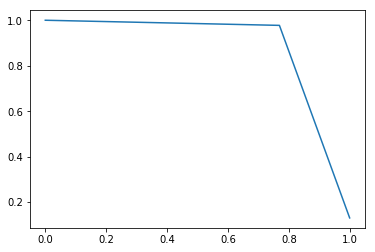

In [14]:
from sklearn.metrics import precision_recall_curve

label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model_2: Naive Bayes(Multinomial)

Naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.

With a multinomial event model, samples (feature vectors) represent the frequencies with which certain events have been generated by a multinomial (p1,...pn)  where pi is the probability that event i occurs. A feature vector (x1, ..., xn) is then a histogram, with xi counting the number of times event i was observed in a particular instance. This is the event model typically used for document classification, with events representing the occurrence of a word in a single document.

In [15]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', naive_bayes)])

### Calculating Cross Validation score

In [16]:
cv_score_naive_bayes = cross_val_score(pipeline_bayes, sms_train, label_train, cv=5)
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
[0.94458763 0.95103093 0.94580645 0.95354839 0.94056848]


### Statistics of the fitting

In [17]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_bayes.fit(sms_train, label_train)
label_predicted = pipeline_bayes.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1124
        spam       1.00      0.69      0.81       169

   micro avg       0.96      0.96      0.96      1293
   macro avg       0.98      0.84      0.90      1293
weighted avg       0.96      0.96      0.96      1293



### Precision Recall Curve

The precision recall curve


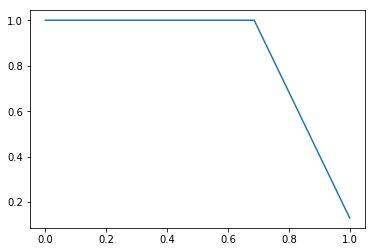

In [18]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model_3: Decision Tree

Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. The classification technique is a systematic approach to build classification models from an input dat set.  It applies a straitforward idea to solve the classification problem. Decision Tree Classifier poses a series of carefully crafted questions about the attributes of the test record. Each time time it receive an answer, a follow-up question is asked until a conclusion about the calss label of the record is reached. The decision tree classifiers organized a series of test questions and conditions in a tree structure.  In the decision tree, the root and internal nodes contain attribute test conditions to separate recordes that have different characteristics. All the terminal node is assigned a class lable Yes or No. 

Once the decision tree has been constructed, classifying a test record is straightforward. Starting from the root node, we apply the test condition to the record and follow the appropriate branch based on the outcome of the test. It then lead us either to another internal node, for which a new test condition is applied, or to a leaf node. When we reach the leaf node, the class lable associated with the leaf node is then assigned to the record.



In [19]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
pipeline_decision_tree = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', decision_tree)])

### Calculating Cross Validation score

In [20]:
cv_score_decision_tree = cross_val_score(pipeline_decision_tree, sms_train, label_train, cv=5)
print("The cross validation score for Decison Tree is:")
print(cv_score_decision_tree)

The cross validation score for Decison Tree is:
[0.95103093 0.95747423 0.96516129 0.95612903 0.95478036]


### Statistics of the fitting

In [21]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_decision_tree.fit(sms_train, label_train)
label_predicted = pipeline_decision_tree.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.97      0.98      0.97      1124
        spam       0.84      0.80      0.82       169

   micro avg       0.95      0.95      0.95      1293
   macro avg       0.90      0.89      0.90      1293
weighted avg       0.95      0.95      0.95      1293



### Precision Recall Curve

The precision recall curve


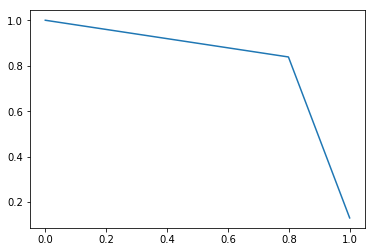

In [22]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]


print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model_4 : Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane. 

Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
pipeline_svc = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', svc)])

### Calculating Cross Validation score

In [24]:
cv_score_svc = cross_val_score(pipeline_svc, sms_train, label_train, cv=5)
print("The cross validation score for Decison Tree is:")
print(cv_score_svc)

The cross validation score for Decison Tree is:
[0.99097938 0.98453608 0.98451613 0.98451613 0.97932817]


### Statistics of the fitting

In [25]:
pipeline_svc.fit(sms_train, label_train)
label_predicted = pipeline_svc.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1124
        spam       0.96      0.89      0.92       169

   micro avg       0.98      0.98      0.98      1293
   macro avg       0.97      0.94      0.96      1293
weighted avg       0.98      0.98      0.98      1293



### Precision Recall Curve 

The precision recall curve


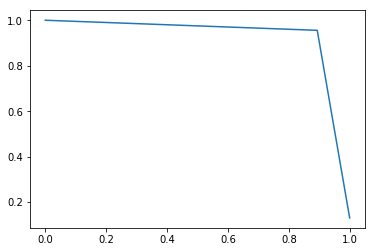

In [26]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]


print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model_5 : Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

In [27]:
#Model 4:Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
pipeline_forest = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', random_forest)])

### Calculating Cross Validation score

In [28]:
cv_score_random_forest = cross_val_score(pipeline_forest, sms_train, label_train, cv=5)
print("The cross validation score for Random Forest is:")
print(cv_score_random_forest)

The cross validation score for Random Forest is:
[0.97164948 0.96262887 0.96774194 0.96516129 0.96640827]


### Statistics of the fitting

In [29]:
#
#Note convert the labels to binary labels to use precision and recall

pipeline_forest.fit(sms_train, label_train)
label_predicted = pipeline_forest.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1124
        spam       0.98      0.75      0.85       169

   micro avg       0.97      0.97      0.97      1293
   macro avg       0.97      0.87      0.91      1293
weighted avg       0.97      0.97      0.96      1293



### Precision Recall Curve

The precision recall curve is:


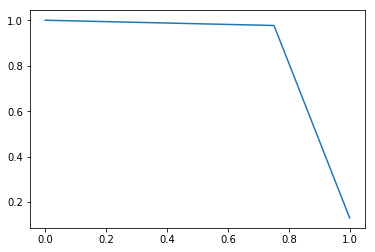

In [30]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]


print("The precision recall curve is:")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)

# Model_6 : Naive Bayes(Bernoulli)

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other. Naive Bayes is a conditional probability model.

Multivariate Bernoulli model is one of the classifiers under Naive Bayes family. In the Multivariate Bernoulli event model, features are independent booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks. where binary term occurrence features are used rather than term frequencies.

In [31]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', naive_bayes)])

### Calculating Cross Validation score

In [32]:
cv_score_naive_bayes = cross_val_score(pipeline_bayes, sms_train, label_train, cv=5)
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
[0.97680412 0.97036082 0.96387097 0.97548387 0.96382429]


### Statistics of the fitting 

In [33]:
pipeline_bayes.fit(sms_train, label_train)
label_predicted = pipeline_bayes.predict(sms_test)

print(classification_report(label_test,label_predicted))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1124
        spam       1.00      0.82      0.90       169

   micro avg       0.98      0.98      0.98      1293
   macro avg       0.99      0.91      0.94      1293
weighted avg       0.98      0.98      0.98      1293



### Precision Recall Curve

The precision recall curve


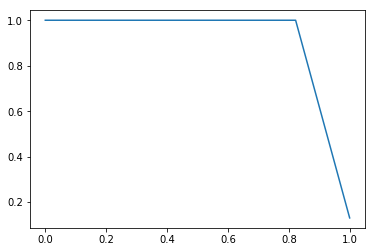

In [34]:
label_bin_true = [set_binary_labels(label) for label in list(label_test)] 
label_bin_predict = [set_binary_labels(label) for label in list(label_predicted)]

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(label_bin_true, label_bin_predict)
plt.plot(recall, precision)